In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import get_dummies
from pandas import concat
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [78]:
glassdoor  = pd.read_csv('watson_glassdoor_tw.csv')
#glassdoor = pd.read_csv('C:/Users/boyerm/Documents/Thinkful/watson_glassdoor_tw.csv')
glassdoor['influence_ratio'] = round(glassdoor['influence_ratio'],0)

def f(row):
    if row['influence_ratio'] < 10:
        val = 0
    else:
        val = 1
    return val

glassdoor['influence_rank'] = glassdoor.apply(f, axis=1)




In [79]:
glassdoor.head()

,anger,disgust,fear,handle,joy,sadness,tweets,Adventurousness,Artistic interests,Emotionality,...,pctApprove,pctDisapprove,fav_count,followers,friends,status_count,verified,year_started,influence_ratio,influence_rank
0,0.027637,0.041793,0.052133,@target,0.710294,0.066762,98.0,0.938407,0.875147,0.943644,...,74.0,26.0,8148.0,1911555.0,2613.0,48816.0,True,2009.0,732.0,1
1,0.078106,0.078799,0.077643,@wellsfargojobs,0.554264,0.558970,98.0,0.962161,0.308413,0.129336,...,81.0,19.0,1029.0,12379.0,606.0,7519.0,True,2010.0,20.0,1
2,0.124485,0.105139,0.079033,@dictionarycom,0.610125,0.506170,97.0,0.715706,0.992374,0.546490,...,68.0,32.0,1770.0,203776.0,24059.0,14575.0,True,2009.0,8.0,0
3,0.052529,0.035499,0.050337,@homedepotcareer,0.614395,0.082604,52.0,0.862837,0.164782,0.090510,...,79.0,21.0,1455.0,24134.0,116.0,10270.0,True,2011.0,208.0,1
4,0.071566,0.054710,0.035488,@macysjobs,0.712694,0.433592,82.0,0.950945,0.612638,0.481558,...,66.0,34.0,1069.0,19311.0,2027.0,2239.0,False,2013.0,10.0,1


## Clean Up data before slicing

In [80]:
glassdoor = glassdoor.dropna()

In [81]:
# sector make dummies
sector_cats = get_dummies(glassdoor.sectorName.fillna("Unknown"))
glassdoor = concat([glassdoor, sector_cats],1)

## Visualize data

In [82]:
glassdoor.shape

(312, 83)

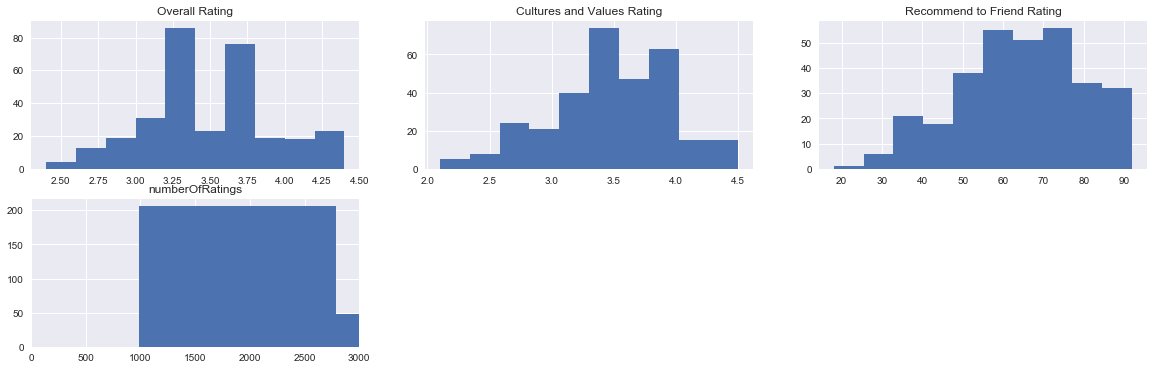

In [83]:
plt.figure(figsize=(20,6))

plt.subplot(2,3,1)
plt.hist(glassdoor['overallRating'])
plt.title('Overall Rating')

plt.subplot(2,3,2)
plt.hist(glassdoor['cultureAndValuesRating'])
plt.title('Cultures and Values Rating')


plt.subplot(2,3,3)
plt.hist(glassdoor['recommendToFriendRating'])
plt.title('Recommend to Friend Rating')

plt.subplot(2,3,4)
plt.hist(glassdoor['numberOfRatings'])
plt.title('numberOfRatings')
plt.xlim(0,3000);

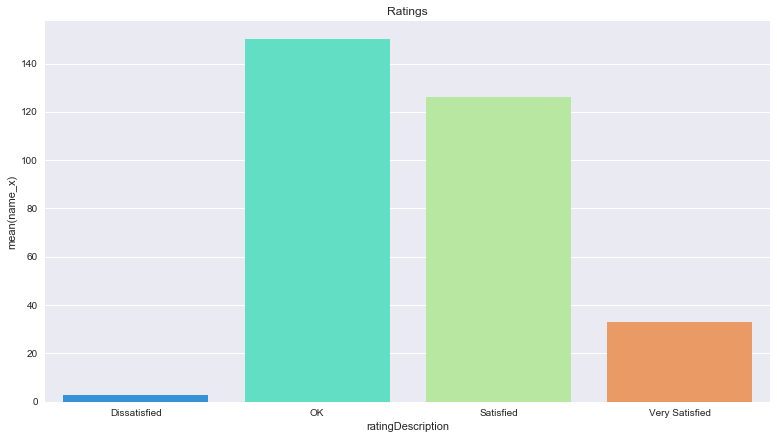

In [84]:
ratings = glassdoor.groupby('ratingDescription').count()['name_x']
g = sns.barplot(ratings.index, ratings, palette='rainbow')
#.sort(['Dissatisfied', 'OK','Satisfied','Very Satisfied'])
g.figure.set_size_inches(13,7)
g.set_title("Ratings")
plt.show()

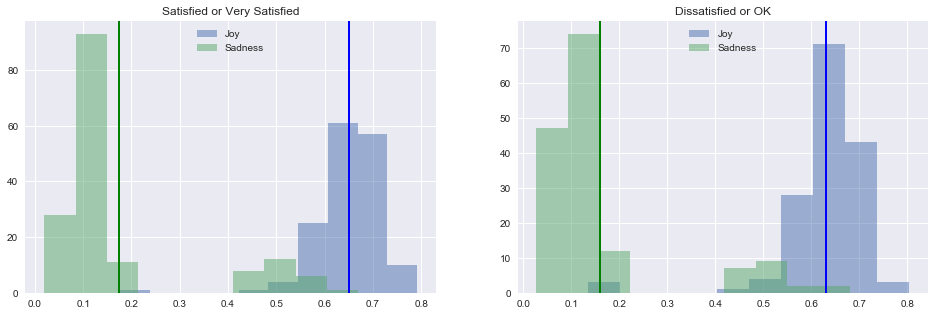

In [85]:
vss = glassdoor.query('overallRating > 3.4')
disok = glassdoor.query('overallRating <= 3.4')

plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
plt.hist(vss['joy'],label = 'Joy', alpha = 0.5)
plt.axvline(vss['joy'].mean(), color='b', linestyle='solid', linewidth=2)

plt.subplot(1,3,1)
plt.hist(vss['sadness'],label = 'Sadness', alpha = 0.5)
plt.title('Satisfied or Very Satisfied')
plt.axvline(vss['sadness'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper center')

plt.subplot(1,3,2)
plt.hist(disok['joy'],label = 'Joy', alpha = 0.5)
plt.axvline(disok['joy'].mean(), color='b', linestyle='solid', linewidth=2)

plt.subplot(1,3,2)
plt.hist(disok['sadness'],label = 'Sadness', alpha = 0.5)
plt.title('Dissatisfied or OK')
plt.axvline(disok['sadness'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper center');

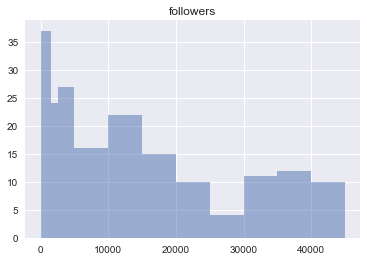

In [86]:
#ratings = glassdoor.groupby('followers').count()['name_x']
#g = sns.barplot(ratings.index, ratings, palette='rainbow')
#.sort(['Dissatisfied', 'OK','Satisfied','Very Satisfied'])
#g.figure.set_size_inches(13,8)
#g.set_title("Followers")
#plt.show()

plt.hist(glassdoor['followers'],label = 'followers', alpha = 0.5, bins = (0,1500,2500,5000,10000,15000,20000,25000,30000,35000,40000,45000))
plt.title('followers');

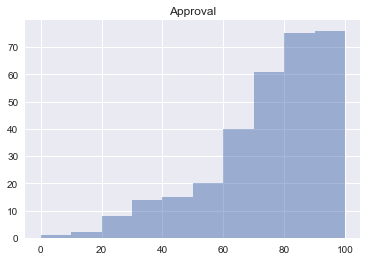

In [87]:
plt.hist(glassdoor['pctApprove'],label = 'Approval', alpha = 0.5)
plt.title('Approval');

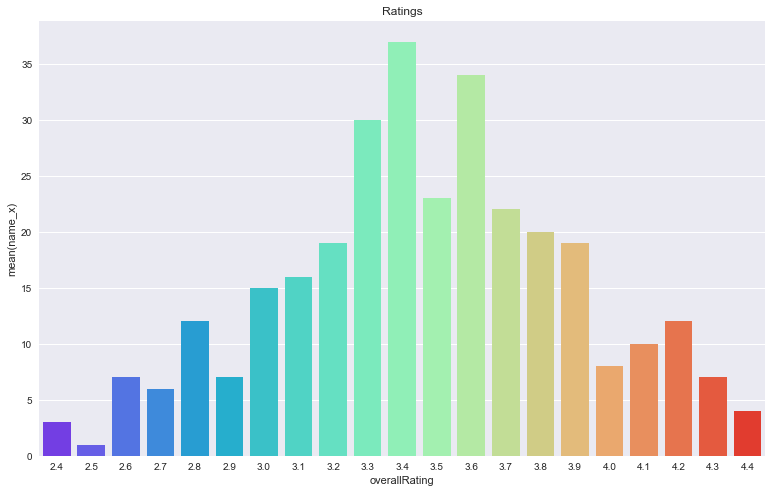

In [88]:
ratings = glassdoor.groupby('overallRating').count()['name_x']
g = sns.barplot(ratings.index, ratings, palette='rainbow')
#.sort(['Dissatisfied', 'OK','Satisfied','Very Satisfied'])
g.figure.set_size_inches(13,8)
g.set_title("Ratings")
plt.show()

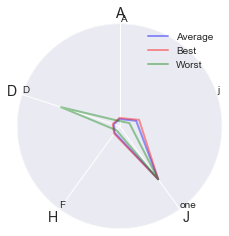

In [89]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 2), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 1)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)



fig = pl.figure(figsize=(3, 3))

titles = list("ADHJS")

labels = [
    list("Anger"), list("Disgust"), list("Fear"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

# 0.07 	 0.06 	 0.08 		 0.64 	 0.17 
#anger	disgust	fear	handle	joy	sadness
# 0.08 	 0.07 	 0.09 		 0.64 	 0.20 # best
# 0.048546667	0.063838333	0.051153333		0.640161667	0.100443333 worst


radar = Radar(fig, titles, labels)
radar.plot([0.07, 0.06, 0.08, 0.64, 0.17],  "-", lw=2, color="b", alpha=0.4, label="Average")
radar.plot([0.08,0.07, 0.09, 0.64,0.2],"-", lw=2, color="r", alpha=0.4, label="Best")
radar.plot([0.05, 0.6, 0.05, .64, .1], "-", lw=2, color="g", alpha=0.4, label="Worst")
radar.ax.legend();

In [90]:
glassdoor.shape

(312, 83)

### MODEL SET UP (rating)

In [91]:
#trainsize = int(glassdoor.shape[0] / 2)
#glassdoor_train = glassdoor.iloc[:trainsize, :].copy()
#glassdoor_test = glassdoor.iloc[trainsize:, :].copy()

msk = np.random.rand(len(glassdoor)) < 0.5

glassdoor_train = glassdoor[msk]
glassdoor_test = glassdoor[~msk]

In [92]:

drop_cols = ['tweets','all_text','name_x','name_y','ratingDescription','cultureAndValuesRating','seniorLeadershipRating',
                    'compensationAndBenefitsRating','careerOpportunitiesRating','workLifeBalanceRating','numberOfRatings',
                    'recommendToFriendRating','sectorName','pctApprove','pctDisapprove','handle','overallRating']

NLU_Cols = ['anger','disgust','fear','joy','sadness'] # not better alone
PI_Cols = ['Adventurousness','Artistic interests','Emotionality','Imagination','Intellect','Liberalism','Achievement striving',
'Cautiousness','Dutifulness','Orderliness','Self-discipline','Self-efficacy','Activity level','Assertiveness','Cheerfulness',
           'Excitement-seeking','Friendliness','Gregariousness','Altruism','Cooperation','Modesty','Morality','Sympathy',
           'Trust','Anger','Anxiety','Depression','Immoderation','Self-consciousness','Vulnerability'] # not better alone
Twitter_Cols = ['fav_count','followers','friends','status_count','verified','year_started','influence_ratio']  # not better than with other cols

data_train = glassdoor_train.drop(drop_cols,1)
#data_train = glassdoor_train[NLU_Cols]
#data_train = glassdoor_train[PI_Cols]
#data_train = glassdoor_train[Twitter_Cols]
target_train = glassdoor_train.overallRating

data_test = glassdoor_test.drop(drop_cols,1)
#data_test = glassdoor_test[NLU_Cols]
#data_test = glassdoor_test[PI_Cols]
#data_test = glassdoor_test[Twitter_Cols]
target_test = glassdoor_test.overallRating

In [93]:
#scaler = StandardScaler()  

#scaler.fit(data_train)  
#data_train = scaler.transform(data_train)  
#data_test = scaler.transform(data_test) 


In [94]:
glassdoor_train.shape

(149, 83)

In [95]:
glassdoor_test.shape

(163, 83)

In [96]:
data_train.shape

(149, 66)

In [97]:
data_test.shape

(163, 66)

### Random Forest

In [98]:
rfr = ensemble.RandomForestRegressor()

rfr.fit(data_train,target_train)
cross_val_score(rfr, data_train, target_train, cv=5)

array([ 0.10091285,  0.01465986, -0.36865979,  0.05382185,  0.02765331])

In [99]:
print(rfr.score(data_train,target_train))
print(rfr.score(data_test,target_test))

0.843214598732
0.14711944683


In [100]:
y_pred_train = rfr.predict(data_train)
y_pred_test = rfr.predict(data_test)

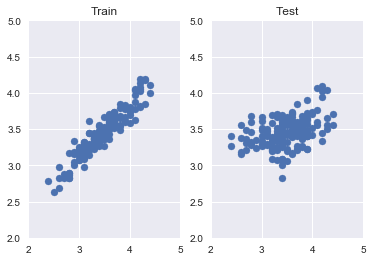

In [101]:
fig, ax = plt.subplots(nrows=1,ncols=2)

plt.subplot(1,2,1)
plt.scatter(target_train,y_pred_train)
plt.ylim((2,5))
plt.xlim((2,5))
plt.title("Train")

plt.subplot(1,2,2)
plt.scatter(target_test,y_pred_test)
plt.ylim((2,5))
plt.xlim((2,5))
plt.title("Test");

In [102]:
importances = rfr.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
g = 0
for f in range(data_test.shape[1]):
    if importances[indices[f]] > 0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        g += 1
    else:
        continue

Feature ranking:
1. feature 50 (0.146550)
2. feature 16 (0.091879)
3. feature 10 (0.050441)
4. feature 20 (0.042355)
5. feature 5 (0.041510)
6. feature 0 (0.039944)
7. feature 6 (0.036226)
8. feature 27 (0.035203)
9. feature 26 (0.030051)
10. feature 38 (0.029800)
11. feature 9 (0.027413)
12. feature 8 (0.027386)
13. feature 13 (0.025549)
14. feature 15 (0.023888)
15. feature 11 (0.021403)
16. feature 40 (0.020788)
17. feature 3 (0.020693)
18. feature 32 (0.019355)
19. feature 23 (0.019287)
20. feature 22 (0.019158)
21. feature 30 (0.016288)
22. feature 24 (0.015417)
23. feature 36 (0.015340)
24. feature 4 (0.015098)
25. feature 28 (0.014800)
26. feature 54 (0.014368)
27. feature 41 (0.012491)
28. feature 31 (0.012027)
29. feature 1 (0.011869)
30. feature 2 (0.010822)


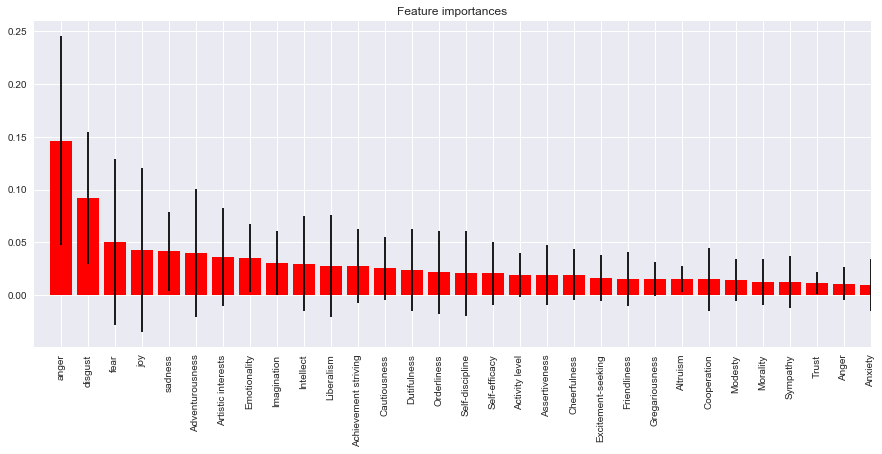

In [103]:
# Plot the feature importances of the forest
#plt.figure()
plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(data_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
feature_names = data_test.columns 
plt.xticks(range(data_test.shape[1]), feature_names,rotation=90)
plt.xlim([-1, g]) # data_test.shape[1]])
plt.show()

### LINEAR REGRESSION

In [104]:
regr = linear_model.LinearRegression()
regr.fit(data_train,target_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared train:')
print(regr.score(data_train,target_train))
print('\nR-squared test:')
print(regr.score(data_test,target_test))

y_pred_test = regr.predict(data_test)
y_pred_train = regr.predict(data_train)


Coefficients: 
 [ -1.31179348e+00   3.60629654e-02   5.47761873e-01   8.48294008e-01
  -5.29822301e-02   5.72123641e-01   1.74092767e-01   1.95448028e-01
   5.50781534e-02   1.46182826e-01  -9.14309471e-02   5.76368740e-01
   3.65535621e-01  -1.73445955e-01   1.51405203e-01  -1.03175653e+00
  -5.20403029e-01  -7.77323242e-01   6.40200351e-01   2.56518061e-01
   7.75501165e-02   5.17786884e-01  -4.87152477e-01  -5.46594812e-01
  -1.79226163e-01   4.53010123e-02   3.44424897e-01  -2.77169082e-01
   7.79630762e-01   1.63839999e+00   6.82605658e-01   2.28056475e-01
  -2.97249305e-01  -7.79981787e-01  -9.82689329e-01  -2.01471607e-06
  -5.44449336e-08   7.87171760e-06   2.60231971e-07  -1.42409493e-02
   1.43978641e-03  -4.53080164e-06   1.45084860e-01   1.31350000e-01
  -1.39538059e-01   0.00000000e+00  -8.44168085e-02   4.30842695e-01
  -2.30088717e-01  -3.04040987e-01   4.94071686e-01  -6.03400332e-02
   6.08439142e-01  -2.73061668e-01   1.22569246e-01  -5.39549666e-03
   3.50955417e-01

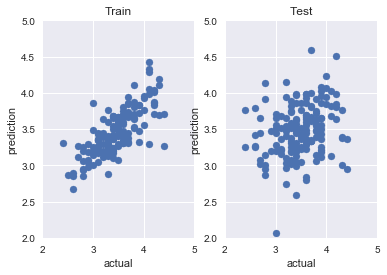

In [105]:
fig, ax = plt.subplots(nrows=1,ncols=2)

plt.subplot(1,2,1)
plt.scatter(target_train,y_pred_train)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((2,5))
plt.xlim((2,5))
plt.title("Train")

plt.subplot(1,2,2)
plt.scatter(target_test,y_pred_test)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((2,5))
plt.xlim((2,5))
plt.title("Test");

### LASSO

In [106]:
lass = linear_model.Lasso(alpha=.15)
lassfit = lass.fit(data_train, target_train)
print('R² for the model (train):')
print(lass.score(data_train, target_train))

print('R² for the model (test):')
print(lass.score(data_test, target_test))

#origparams = np.append(lassfit.coef_, lassfit.intercept_)
#print('\nParameter estimates for the model with few features:')
#print(origparams)

R² for the model (train):
0.0207606082025
R² for the model (test):
-0.0126373374405


### KNN Model

[-0.04964138 -0.2938179  -0.55226804 -0.31912865 -0.39990716]
0.167961085629
-0.177482604528


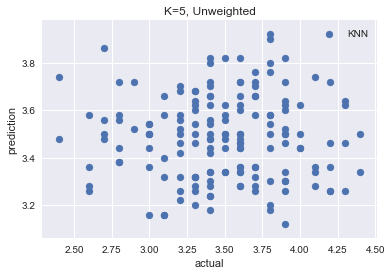

In [107]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)     #weights='distance'
knn.fit(data_train,target_train)
score = cross_val_score(knn, data_train,target_train, cv=5)
print(score)
print(knn.score(data_train,target_train))
print(knn.score(data_test,target_test))

# Make point predictions on the test set using the fit model.
predictions = knn.predict(data_test)
actual = target_test
plt.scatter(actual, predictions, label = 'KNN')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('K=5, Unweighted')
plt.show()

[-0.0359628  -0.33371298 -0.55897241 -0.3327398  -0.36659419]
-0.232968065841


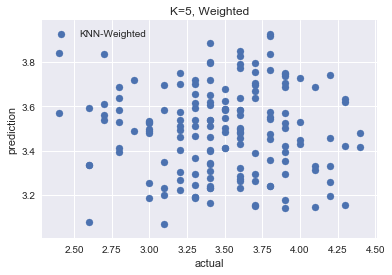

In [108]:
from sklearn import neighbors

# Build our model.
knnw = neighbors.KNeighborsRegressor(n_neighbors=5,weights='distance')
knnw.fit(data_train,target_train)
score = cross_val_score(knnw, data_train,target_train, cv=5)
print(score)
print(knnw.score(data_test,target_test))

# Make point predictions on the test set using the fit model.
predictions = knnw.predict(data_test)
actual = target_test
plt.scatter(actual, predictions, label = 'KNN-Weighted')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('K=5, Weighted')
plt.show()

## MODEL SET UP (classification)

In [109]:
Ctarget_train = glassdoor_train.ratingDescription
Ctarget_test = glassdoor_test.ratingDescription


### KNN Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(data_train,Ctarget_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [111]:
neighbors.score(data_train,Ctarget_train)

0.61073825503355705

In [112]:
neighbors.score(data_test,Ctarget_test)

0.49693251533742333

In [113]:
# Classify, storing the result in a new variable.
y_pred_train = neighbors.predict(data_train)
y_pred_test = neighbors.predict(data_test)


# Display our results.
print("Train:Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (Ctarget_train != y_pred_train).sum()
))
print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (Ctarget_test != y_pred_test).sum()
))

Train:Number of mislabeled points out of a total 149 points : 58
Test: Number of mislabeled points out of a total 163 points : 82


In [114]:
# better :) Let's see the type of error
pd.crosstab(Ctarget_train, y_pred_train)

col_0,OK,Satisfied,Very Satisfied
ratingDescription,,,
Dissatisfied,0,0,1
OK,53,20,1
Satisfied,18,37,1
Very Satisfied,11,6,1


In [115]:
pd.crosstab(Ctarget_test, y_pred_test)

col_0,OK,Satisfied,Very Satisfied
ratingDescription,,,
Dissatisfied,1,1,0
OK,51,25,0
Satisfied,39,30,1
Very Satisfied,11,4,0


In [116]:
glassdoor_test2 = glassdoor_test
glassdoor_test2['pred'] = y_pred_test
Ctarget_test.head()
pd.crosstab(glassdoor_test2.overallRating, glassdoor_test2.pred, margins=True)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


pred,OK,Satisfied,Very Satisfied,All
overallRating,,,,
2.4,1,1,0,2
2.6,3,1,0,4
2.7,2,2,0,4
2.8,4,2,0,6
2.9,0,2,0,2
3.0,7,1,0,8
3.1,5,1,0,6
3.2,4,7,0,11
3.3,12,2,0,14


### SVM Classifier

In [117]:
from sklearn import svm
from sklearn.svm import SVC
clf = SVC()
clf = svm.SVC()
clf.fit(data_train, Ctarget_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
y_pred_train = clf.predict(data_train)
y_pred_test = clf.predict(data_test)


# Display our results.
print("Train:Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (Ctarget_train != y_pred_train).sum()
))
print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (Ctarget_test != y_pred_test).sum()
))

Train:Number of mislabeled points out of a total 149 points : 0
Test: Number of mislabeled points out of a total 163 points : 87


In [119]:
clf.score(data_train, Ctarget_train)

1.0

In [120]:
clf.score(data_test, Ctarget_test)

0.46625766871165641

In [121]:
## KNN was better

In [122]:
pd.crosstab(Ctarget_train, y_pred_train)

col_0,Dissatisfied,OK,Satisfied,Very Satisfied
ratingDescription,,,,
Dissatisfied,1,0,0,0
OK,0,74,0,0
Satisfied,0,0,56,0
Very Satisfied,0,0,0,18


In [123]:
pd.crosstab(Ctarget_test, y_pred_test)

col_0,OK
ratingDescription,
Dissatisfied,2
OK,76
Satisfied,70
Very Satisfied,15


### Random Forest Classifier

In [124]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, data_train, Ctarget_train, cv=5)
rfc.fit(data_train, Ctarget_train)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [125]:
importances = rfc.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
g = 1
for f in range(data_test.shape[1]):
    if importances[indices[f]] > 0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        g += 1
    else:
        continue
print(g)

Feature ranking:
1. feature 8 (0.059343)
2. feature 36 (0.050187)
3. feature 50 (0.046408)
4. feature 41 (0.043951)
5. feature 15 (0.041746)
6. feature 13 (0.040089)
7. feature 6 (0.039967)
8. feature 0 (0.035184)
9. feature 20 (0.033623)
10. feature 5 (0.033135)
11. feature 7 (0.032765)
12. feature 12 (0.027534)
13. feature 16 (0.027048)
14. feature 9 (0.024743)
15. feature 4 (0.023977)
16. feature 26 (0.022694)
17. feature 3 (0.022442)
18. feature 35 (0.021813)
19. feature 31 (0.021190)
20. feature 11 (0.020400)
21. feature 22 (0.019702)
22. feature 33 (0.019350)
23. feature 1 (0.019113)
24. feature 34 (0.018573)
25. feature 23 (0.018331)
26. feature 37 (0.017848)
27. feature 39 (0.017419)
28. feature 10 (0.016893)
29. feature 32 (0.016551)
30. feature 19 (0.015353)
31. feature 21 (0.014591)
32. feature 42 (0.014553)
33. feature 17 (0.013323)
34. feature 29 (0.011704)
35. feature 27 (0.011533)
36. feature 25 (0.011023)
37. feature 24 (0.010322)
38. feature 38 (0.010305)
39. feature 2

In [136]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_train.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort(['Importance'], ascending=[0])

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [137]:
imp = importances[:10]
print(imp)


                    Importance
Imagination           0.059343
followers             0.050187
Education             0.046408
influence_ratio       0.043951
Self-discipline       0.041746
Dutifulness           0.040089
Artistic interests    0.039967
anger                 0.035184
Excitement-seeking    0.033623
Adventurousness       0.033135


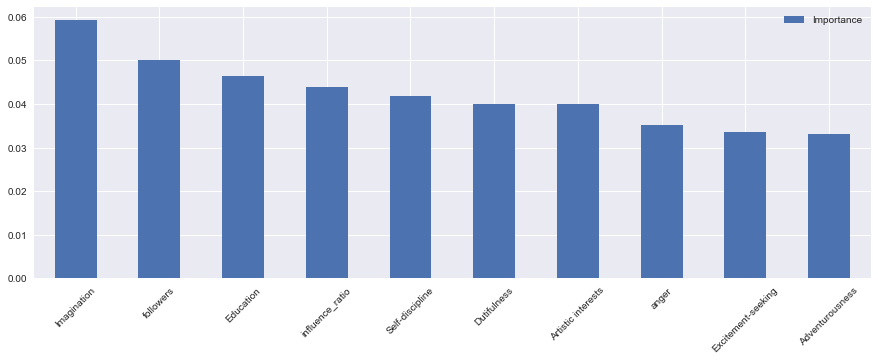

In [140]:
imp.sort_values(by='Importance', ascending= False).plot(kind='bar', rot=45,figsize=(15, 5));

IndexError: indices are out-of-bounds

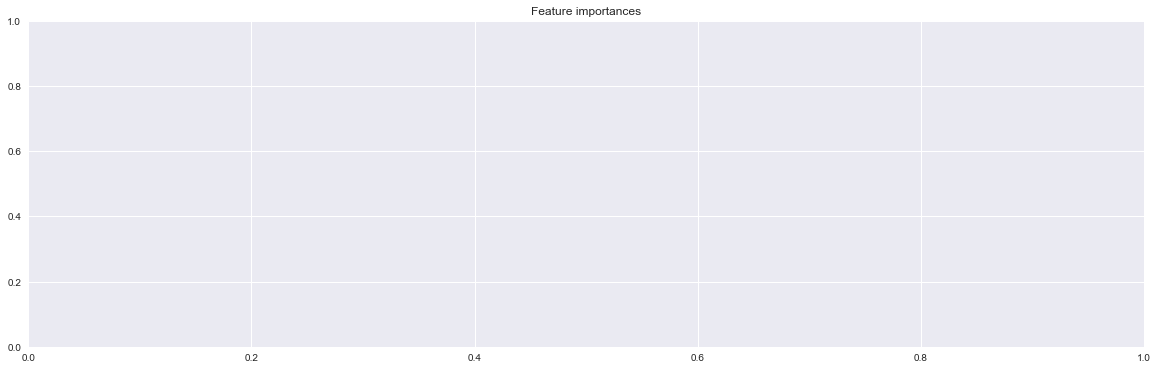

In [129]:
#MOVE THIS CODE OUT
# Plot the feature importances of the forest
#plt.figure()
plt.figure(figsize=(20,6))
plt.title("Feature importances")
plt.bar(range(data_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
feature_names = data_test.columns 
plt.xticks(range(data_test.shape[1]), feature_names,rotation=90)
plt.xlim([-1, g]) #data_test.shape[1]])
plt.show()

In [130]:
print(rfc.score(data_train,Ctarget_train))
print(rfc.score(data_test,Ctarget_test))

0.986577181208
0.59509202454


In [131]:
y_pred_train = rfc.predict(data_train)
y_pred_test = rfc.predict(data_test)


# Display our results.
print("Train:Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (Ctarget_train != y_pred_train).sum()
))
print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (Ctarget_test != y_pred_test).sum()
))

Train:Number of mislabeled points out of a total 149 points : 2
Test: Number of mislabeled points out of a total 163 points : 66


In [132]:
pd.crosstab(Ctarget_train, y_pred_train)

col_0,Dissatisfied,OK,Satisfied,Very Satisfied
ratingDescription,,,,
Dissatisfied,1,0,0,0
OK,0,74,0,0
Satisfied,0,0,56,0
Very Satisfied,0,0,2,16


In [133]:
pd.crosstab(Ctarget_test, y_pred_test)

col_0,OK,Satisfied,Very Satisfied
ratingDescription,,,
Dissatisfied,2,0,0
OK,57,18,1
Satisfied,32,37,1
Very Satisfied,8,4,3


In [134]:
glassdoor_test2 = glassdoor_test
glassdoor_test2['pred'] = y_pred_test
Ctarget_test.head()
pd.crosstab(glassdoor_test2.overallRating, glassdoor_test2.pred, margins=True)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


pred,OK,Satisfied,Very Satisfied,All
overallRating,,,,
2.4,2,0,0,2
2.6,3,1,0,4
2.7,3,1,0,4
2.8,4,1,1,6
2.9,2,0,0,2
3.0,5,3,0,8
3.1,5,1,0,6
3.2,8,3,0,11
3.3,10,4,0,14


In [135]:
glassdoor_train2 = glassdoor_train
glassdoor_train2['pred'] = y_pred_train
Ctarget_train.head()
pd.crosstab(glassdoor_train2.overallRating, glassdoor_train2.pred, margins=True)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


pred,Dissatisfied,OK,Satisfied,Very Satisfied,All
overallRating,,,,,
2.4,1,0,0,0,1
2.5,0,1,0,0,1
2.6,0,3,0,0,3
2.7,0,2,0,0,2
2.8,0,6,0,0,6
2.9,0,5,0,0,5
3.0,0,7,0,0,7
3.1,0,10,0,0,10
3.2,0,8,0,0,8
